In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab.ipynb")

# DSC 80: Lab 09

### Due Date: Monday, November 29th, 11:59PM

## Instructions
Much like in DSC 10, this Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding work will be developed in an accompanying `lab*.py` file, that will be imported into the current notebook.

Labs and programming assignments will be graded in (at most) two ways:
1. The functions and classes in the accompanying python file will be tested (a la DSC 20),
2. The notebook will be graded (for graphs and free response questions).

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for working in the Notebook**:
- The notebooks serve to present you the questions and give you a place to present your results for later review.
- The notebook on *lab assignments* are not graded (only the `.py` file).
- Notebooks for PAs will serve as a final report for the assignment, and contain conclusions and answers to open ended questions that are graded.
- The notebook serves as a nice environment for 'pre-development' and experimentation before designing your function in your `.py` file.

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are encouraged to write your own additional functions to solve the lab! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `lab.py` (much like we do in the notebook).
- Always document your code!

### Importing code from `lab.py`

* We import our `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab` merely import the existing compiled python.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lab import *

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

# Getting Acquainted with `sklearn` Pipelines

The file `data/toy.csv` contains toy data that consists of 4 columns:
```
group: a categorical column with 3 categories
c1: a numeric attribute
c2: a numeric attribute
y: the target variable (that you want to predict) 
```

In the following questions, you will build ML pipelines that combine feature engineering with a simple linear regression model.

In [5]:
fp = os.path.join('data', 'toy.csv')
data = pd.read_csv(fp)
data.head()

,group,c1,c2,y
0,B,4.058118,5.329582,12.649035
1,A,4.194945,3.839476,17.309083
2,A,2.246411,10.694666,15.695646
3,B,2.510912,6.414960,11.535752
4,B,3.194722,6.116839,14.954389


**Question 1**

First, you will train a regression model using only a *log-scaled* `c2` variable. Create a simple pipeline that:
1. log-scales `c2`, then
2. predicts `y` using a linear regression model (using your transformed `c2`).

That is, create a function `simple_pipeline` that takes in a dataframe like `data` and returns a tuple consisting of the pipeline and the predictions your model makes on `data` (as trained on `data`).

In [32]:
fp = os.path.join('data', 'toy.csv')
data = pd.read_csv(fp)
# simple_pipeline(data)

In [127]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2**

Now, you will engineer features from the other columns and use them to train a regression model.  Create a pipeline that:
1. uses `c1` as is,
1. log-scales `c2`,
1. one-hot encodes `group`,
1. predicts `y` using a linear regression model built on the three variable-classes above.

Use `ColumnTransformer` to put together all the column-specific preprocessing steps into a single set of features for fitting the regression model.

That is, create a function `multi_type_pipeline` that takes in a dataframe like `data` and returns a tuple consisting of the pipeline and the predictions your model makes on `data` (as trained on `data`).


In [108]:
fp = os.path.join('data', 'toy.csv')
data = pd.read_csv(fp)
data

,group,c1,c2,y
0,B,4.058118,5.329582,12.649035
1,A,4.194945,3.839476,17.309083
2,A,2.246411,10.694666,15.695646
3,B,2.510912,6.414960,11.535752
4,B,3.194722,6.116839,14.954389
...,...,...,...,...
995,C,0.436382,2.718282,7.725205
996,A,3.121212,8.636007,17.852916
997,B,2.215070,7.197776,13.864179
998,C,2.002297,2.718282,7.826493


In [128]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3**

Notice that `c1` and `c2` have strong associations with the values of `group` (e.g. try `sns.scatterplot` of `c1` and `y`, with `hue='group'`). This suggests that group-wise scaling might make good features. 

In this question, you will `z-scale` both `c1` and `c2` *within* each group `A,B,C`. However, `sklearn` doesn't include this transformer, so it will be necessary to *create your own*. In the starter code, is a skeleton for creating your own `sklearn` transformer class; you will need to create your own `transformer` and `fit` methods.

* You will create `StdScalerByGroup` that fits/transforms input data `X` whose first column contains the groups; the other columns are numeric and will be z-scaled within each group.
* The `fit` method should determine the mean and sample standard-deviation of each group value in the input data `X` and save them in the instance variable `grps_`.
* The `transform` method takes in data `X` and z-scales the columns using the mean/std saved in `grps_`.

*Note:* You may decide on whatever structure you'd like for the `grps_` variable. This question will be graded on the correctness of the output. (Check the correctness of your work by checking the output by-hand!)

*Note:* A reminder that avoid using loops over long iterable subjects!

*Note:* The `group` column in the doctest is named 'g' instead of 'group'. Remember, the first column will **always** contain the groups (even if the name is different)

*Note:* Do not worry about cases where the std = 0.

In [65]:
cols = {'g': ['A', 'A', 'B', 'B'], 'c1': [1, 2, 2, 2], 'c2': [3, 1, 2, 0]}
df = pd.DataFrame(cols)
std = StdScalerByGroup().fit(df)
mean_df = df.groupby(df.columns[0]).mean()
sd_df = df.groupby(df.columns[0]).std()
combine_df = mean_df.merge(sd_df, on = 'g')
combine_df.columns = ['c1_mean', 'c2_mean', 'c1_sd', 'c2_sd']
combine_df.to_dict(orient = 'index')

{'A': {'c1_mean': 1.5,
  'c2_mean': 2.0,
  'c1_sd': 0.7071067811865476,
  'c2_sd': 1.4142135623730951},
 'B': {'c1_mean': 2.0,
  'c2_mean': 1.0,
  'c1_sd': 0.0,
  'c2_sd': 1.4142135623730951}}

In [66]:
df

,g,c1,c2
0,A,1,3
1,A,2,1
2,B,2,2
3,B,2,0


In [68]:
q3_fit_out = StdScalerByGroup()
q3_fit_out.fit(df)
feats = q3_fit_out.transform(df)

In [70]:
feats

,c1,c2
0,-0.707107,0.707107
1,0.707107,-0.707107
2,NaN,0.707107
3,NaN,-0.707107


In [69]:
np.isclose(feats.max(), 11.499, atol=0.01)

array([False, False])

In [129]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4**

Pipelines are supposed to help you easily try different model configurations. Create a function `eval_toy_model` which returns a hard-coded list of tuples consisting of the (RMSE, $R^2$) of 3 different modeling pipelines (fit and evaluated on the entire input `data`). The three different models are:
1. The pipeline in Question 1
1. The pipeline in Question 2
1. A pipeline consisting of a linear regression model fit on features generated by applying `StdScalerByGroup` to `c1`, log-scaling `c2`, and applying `OneHotEncoder` to `group`.

In [149]:
num_feat_1 = ['c1']
num_transformer_1 = Pipeline(steps=[
        ('scaler', StdScalerByGroup()),
    ])

num_feat_2 = ['c2']
num_transformer_2 = Pipeline(steps=[
        ('scaler', FunctionTransformer(np.log)),
    ])

cat_feat = ['group']
cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder())  # output from Ordinal becomes input to OneHot
    ])

preproc = ColumnTransformer(
transformers=[
            ('num_1', num_transformer_1, num_feat_1),
            ('num_2', num_transformer_2, num_feat_2),
            ('cat', cat_transformer, cat_feat)
        ])

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', LinearRegression())])

pl.fit(data[['group', 'c1', 'c2']], data.y)
predict = pl.predict(data[['group', 'c1', 'c2']])
np.sqrt(np.mean((predict - data.y)**2))

2.3518910318553568

In [145]:
simple_pipeline(data)[0].score(np.array(data.c2).reshape(-1, 1), data.y)

0.39558507345910754

In [150]:
pl.score(data.drop('y', axis=1), data.y)

0.5595545806280607

In [156]:
multi_type_pipeline(data)[0].score(data.drop('y', axis=1), data.y)

0.5733249315673331

In [159]:
grader.check("q4")

q4 results: All test cases passed!

## Overfitting model parameters

**Question 5**

In this question, you will train two different prediction models on Galton's child-height dataset from lecture and explore different ways in how overfitting can appear.

**Part 1: Decision Tree Regressor**

* A decision tree regressor is trained similar to decision tree classifiers: the splits of the tree are created by minimizing the variance of the target values of the (training) data in the leaves given by making the split in question. 

* A decision tree regressor predicts the target value of a (new) observation based on the average target value of the training observations lying in the same leaf node. 

* One parameter of a decision tree regressor that affects model complexity is the *depth* of the tree. We will explore this parameter in this question.

* Create a function `tree_reg_perf` that takes in a dataframe like `galton` and outputs a dataframe where each row contains the *RMSE* of a trained decision tree regressor on the training set and test set, indexed by the depth of the decision tree (depth=1,2,3,...,20). (i.e. you should train 20 different decision trees with varying depths and put the train/test error into a dataframe).

*Note* (Optional question good for studying): How is this overfitting and why? What type of variance is causing it? What is the best choice of depth? Plot the dataframe above to help answer these questions.

**Part 2: k-Nearest Neighbor Regressor**

* A k-NN Regressor predicts the target value of a (new) observation by computing the average value of the k-closest observations in the training set.

* One parameter of a k-NN regressor that affects model performance is the number of neighbors averaged over. We will explore this parameter in this question.

* Create a function `knn_reg_perf` that takes in a dataframe like `galton` and outputs a dataframe where each row contains the *RMSE* of a trained k-NN regressor on the training set and test set, indexed by the number of neighbors (k=1,2,3,...,20).

*Note* (Optional question good for studying): How is this overfitting and why? What type of variance is causing it? What is the best choice for the number of neighbors? Plot the dataframe above to help answer these questions.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [99]:
galton_fp = os.path.join('data', 'galton.csv')
galton = pd.read_csv(galton_fp)

In [102]:
out_knn_test = knn_reg_perf(galton)

In [105]:
out_knn_test['test_err'].idxmin() not in [1, 2, 3]

True

In [106]:
out = tree_reg_perf(galton)
out

,train_err,test_err
1,2.487065,2.512425
2,2.285646,2.405062
3,2.110028,2.234237
4,1.948109,2.206515
5,1.797778,2.161198
6,1.622858,2.214697
7,1.429965,2.148843
8,1.265968,2.269564
9,1.053074,2.335123
10,0.857486,2.422613


In [107]:
out = knn_reg_perf(galton)
out

,train_err,test_err
1,0.343558,2.562892
2,1.383426,2.144342
3,1.545334,2.013158
4,1.689037,1.999477
5,1.794139,2.011027
6,1.883051,2.053924
7,1.928020,2.099135
8,1.937014,2.134052
9,1.967980,2.138308
10,1.992101,2.149183


In [141]:
grader.check("q5")

q5 results: All test cases passed!

## Titanic: predicting survival

**Question 6**

Predicting survival on the titanic is a common first assignment when learning classification tasks. There is *a lot* of material out there on analyzing the Titanic data. While not necessary for this question, you are encouraged to look at examples out on the web (e.g. [on kaggle](https://www.kaggle.com/c/titanic)).

Create a function `titanic_model` that takes in training data (a dataframe) and returns a pipeline object fit to the training data. You have freedom to build your own model, but it should satisfy the following requirements:

* The model is built on the target column `Survived`.
* The model uses features derived from *all* **other** columns in training.
* You have one feature derived from the 'title' in the `Name` field ('Mr', 'Miss', 'Master', etc, not the name itself).
* You have one feature that scales the age of a passenger to standard unit among their `Pclass`. (Use Question 3!)
* You can use any classification algorithm, as long as your performance is above the baseline accuracy 0.78.
* If your model (under retraining) can consistently score above 0.83, you can get 5 points extra-credit.
    - Your model will be trained using the training data given in the lab; it will be evaluated using held out test data. This performance should generalize to *unseen* data; you should be honest about parameter-fitting on validation sets and get a score above 0.83 on an untouched *holdout*!

*Note:* You will find [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) useful for the `Name` column, as well as for the standardization of `Ages`. If you want your transformer to output a categorical feature, you will need to select `validate=False`.

*Note*: When using [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer), you may find the `remainder` keyword helpful.

*Note*: The function that is turned in should have the model parameters hard-coded in it. The pipeline object doesn't have to include the parameter selection process.

*Hint*: If you are set out to get that extra 5 points, consider building some meaningful features before fine-tuning the parameters of your model. Do an EDA on the dataset, what kind of people are more prone to survive?

In [9]:
fp = os.path.join('data', 'titanic.csv')
titanic = pd.read_csv(fp)
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,2,Mr. William John Berriman,male,23.0,0,0,13.0000
1,1,3,Mrs. (Beila) Moor,female,27.0,0,1,12.4750
2,0,3,Mr. Nestor Cyriel Vande Walle,male,28.0,0,0,9.5000
3,0,3,Mr. Khalil Saad,male,25.0,0,0,7.2250
4,0,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
...,...,...,...,...,...,...,...,...
705,0,3,Mr. Raihed Razi,male,30.0,0,0,7.2292
706,0,2,Mr. John Henry Chapman,male,37.0,1,0,26.0000
707,1,2,Mrs. Sidney (Emily Hocking) Richards,female,24.0,2,3,18.7500
708,0,3,Mr. Karl Gideon Gustafsson,male,19.0,0,0,7.7750


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import time

In [97]:
def titanic_model(tit):
    titanic = tit.copy()
    titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)
    titanic['Name'] = titanic['Name'].apply(lambda x: x.split(' ')[0])
    def deal_name(X):
        return X

    X = titanic.drop('Survived', axis=1)
    y = titanic.Survived

    X_tr, X_ts, y_tr, y_ts = train_test_split(X,
                                              y,
                                              test_size=0.25,
                                              random_state=42)

    num_feat_1 = ['Age']
    num_transformer_1 = Pipeline(steps=[
        ('scaler', StdScalerByGroup()),
        #         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    num_feat_2 = ['Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
    num_transformer_2 = Pipeline(steps=[
        ('imp', SimpleImputer(strategy='constant', fill_value=0)),
        #         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ])

    cat_feat = ['Pclass', 'Sex']
    cat_transformer = Pipeline(steps=[
        ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
        #         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
        #                 ('pca', PCA(svd_solver='full', n_components=0.99))
    ])

    cat_feat_2 = ['Name']
    cat_transformer_2 = Pipeline(steps=[
        ('imp', SimpleImputer(strategy='constant', fill_value='NULL')
         ), ('clean', FunctionTransformer(deal_name, validate=False))
        #         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
        #                 ('pca', PCA(svd_solver='full', n_components=0.99))
    ])

    preproc = ColumnTransformer(transformers=[(
        'num_1', num_transformer_1,
        num_feat_1), ('num_2', num_transformer_2,
                      num_feat_2), (
                          'cat', cat_transformer,
                          cat_feat), ('cat_2', cat_transformer_2, cat_feat_2)])

    pl = Pipeline(steps=[
        ('preprocessor', preproc),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
#                                  ('pca', PCA(svd_solver='full', n_components=0.99)),
        ('regressor', DecisionTreeClassifier())
    ])
    pl.fit(X, y)
    #     return pl.get_params().keys()
    params = {
        'regressor__max_depth': np.arange(2, 35, 1),
        #     'regressor__max_features': np.arange(1,50)
    }

    grids = GridSearchCV(pl, param_grid=params, cv=5, return_train_score=True)
    grids.fit(X_tr, y_tr)

    grid_keys = grids.cv_results_.keys()
    best = grids.best_params_
    print(best)
    index = grids.param_grid['regressor__max_depth']
    #     index = grids.param_grid['regressor__max_features']
    print(index)

    test = grids.cv_results_['mean_test_score']
    train = grids.cv_results_['mean_train_score']
    pd.DataFrame({'test': test, 'train': train}, index=index).plot()


#     print(train)
#     print(test)

{'regressor__max_depth': 2}
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34]
61.52340269088745


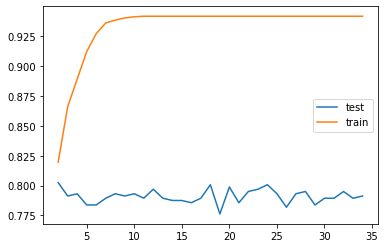

In [98]:
T1 = time.time()
titanic_model(titanic)
T2 = time.time()
print(T2 - T1)

In [ ]:
titanic_model

In [143]:
grader.check("q6")

q6 results: All test cases passed!

## Optional: Amazon Review Rating Classification
#### You won't be graded on this problem, but it is a good practice! 


One of the problems that we often solve in NLP is a classification problem: given a set of documents and their labels (spam/not spam, positive/negative etc), one needs to build a model that can predicts the correct label on a new document. In order to apply classifiers (like random forest or Naive Bayes) we need to transform the text into a (set of) feature vector(s). We already know one of the ways it can be done: using a `bag of words`. In short, you take the available words in a text and keep count when they appear. 

### Bigrams and Trigrams

**Question 7**

In this question, you will build features out of bigrams/trigrams in text-documents, and use these for prediction. You will develop a general approach to a text classification problem and then use different settings (text preprocessing, different classification algorithms etc) to improve the learning rates.

* You are given a data file (`reviews.json`) that you will use to classify Amazon reviews. First you need to extract the text and the rating for each review; Also you need to clean each review before building a model: (convert everything to a lower-case and replace everything but letters, numbers and spaces with a space. In order to do that write a function `json_reader` that takes a file and the number of lines you want to read from the file. It returns two lists: one with cleaned reviews and another one with corresponding ratings (labels). 

* Now write a function `create_classifier_multi` that takes reviews and labels and returns a fit pipeline. You should reserve 20% of you training data for testing. Then set up a classifier using a Pipeline object such that it gives you the highest possible accuracy. Here is a trick: the accuracy is not known beforehand and you should try different classifiers and change their parameters, different pre-processing steps (for example: ngrams, stop words etc) in order to maximize the classifier's score. What is the highest value that you got? 

Do not be discouraged if you can't get a very high accuracy. Think why might it be the case? What if we do not use any algorithms and just assign labels to a new review randomly. What is the chance that you guessed the label correctly? Your accuracy does not seem that bad anymore, right? (If it is below a random assignment then change your code NOW).

In general, a multi-class classification problem is not an easy task. 

* Next you will convert the multi-class classification to the binary classification problem. In order to do that you need to write a method `to_binary` that takes in a list of labels and replaces all 1, 2, 3 reviews with a 0 and 4, 5 reviews with the 1. Build the model again by using different classifiers and pre-processing steps, by writing `create_classifier_binary` method and returning a pipeline that maximized the accuracy. Do you see the improvement? 

In [67]:
fp = os.path.join('data', 'reviews.json')

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()